In [1]:
%matplotlib inline
#%run script
import os

os.sys.path.append("..") #script path

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt 
import defs
from scipy import stats

In [14]:
gt_dir = '../../data/HaN_MICCAI2015_Dataset/full_dataset_orig/dmaps'
ref_dir = '../../fine_stage/hr3d_h_e-3_16-72_d_100k__full_e-4_24-24_gdsc_1024s_dil13/output/50000_test/orig_size/dmaps/'


def addToDict(dictionary, key, value):
    if dictionary.get(key) is None:
        dictionary[key] = [value]
    else:
        dictionary[key].append(value)
        
dist_dict = dict()
        
for ref_file in os.listdir(ref_dir):
    for gt_file in os.listdir(gt_dir):
        if ref_file in gt_file:
            key = None
            for organ in defs.LABELS.keys():
                if organ in ref_file:
                    key = organ
                    break
            #if key is not 'Chiasm':
            #    continue
                    
            print(ref_file, gt_file, key)
            
            refimg_itk = sitk.ReadImage(os.path.join(ref_dir, ref_file))
            gtimg_itk = sitk.ReadImage(os.path.join(gt_dir, gt_file))
            
            refimg_np = sitk.GetArrayFromImage(refimg_itk)
            gtimg_np = sitk.GetArrayFromImage(gtimg_itk)
            
            addToDict(dist_dict, key, (gtimg_np - refimg_np).flatten())
            

0522c0727_Chiasm.nii.gz 0522c0727_Chiasm.nii.gz Chiasm
0522c0806_Chiasm.nii.gz 0522c0806_Chiasm.nii.gz Chiasm
0522c0555_Parotid_R.nii.gz 0522c0555_Parotid_R.nii.gz Parotid_R
0522c0661_OpticNerve_R.nii.gz 0522c0661_OpticNerve_R.nii.gz OpticNerve_R
0522c0845_BrainStem.nii.gz 0522c0845_BrainStem.nii.gz BrainStem
0522c0806_Mandible.nii.gz 0522c0806_Mandible.nii.gz Mandible
0522c0857_Chiasm.nii.gz 0522c0857_Chiasm.nii.gz Chiasm
0522c0667_OpticNerve_L.nii.gz 0522c0667_OpticNerve_L.nii.gz OpticNerve_L
0522c0806_Parotid_R.nii.gz 0522c0806_Parotid_R.nii.gz Parotid_R
0522c0857_BrainStem.nii.gz 0522c0857_BrainStem.nii.gz BrainStem
0522c0878_OpticNerve_L.nii.gz 0522c0878_OpticNerve_L.nii.gz OpticNerve_L
0522c0857_Parotid_L.nii.gz 0522c0857_Parotid_L.nii.gz Parotid_L
0522c0746_OpticNerve_R.nii.gz 0522c0746_OpticNerve_R.nii.gz OpticNerve_R
0522c0659_Chiasm.nii.gz 0522c0659_Chiasm.nii.gz Chiasm
0522c0555_OpticNerve_L.nii.gz 0522c0555_OpticNerve_L.nii.gz OpticNerve_L
0522c0598_BrainStem.nii.gz 0522c05

Text(0.5,0,'Distance to ground truth [mm]')

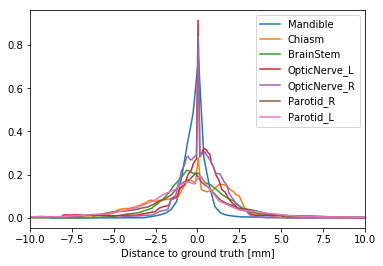

In [5]:
#print(type(dist_dict['Chiasm'][0]))
fig, ax = plt.subplots()
ax.set_xlim([-10,10])

for organ in defs.LABELS.keys():   
    
    combinedlist = np.concatenate(dist_dict[organ])
    y,binEdges=np.histogram(combinedlist,bins=1000,density=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax.plot(bincenters,y,'-', label=organ)
    #ax.hist(combinedlist, density=True, histtype="step", bins=500)
ax.legend()
ax.set_xlabel("Distance to ground truth [mm]")

Text(0.5,-0.08,'Distance to ground truth [mm]')

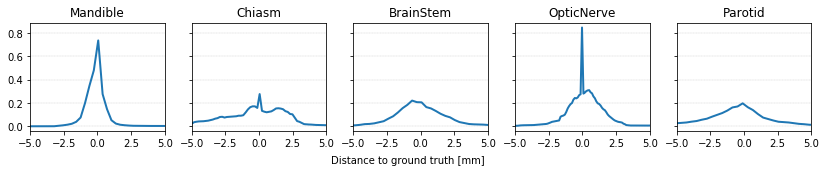

In [31]:
#print(type(dist_dict['Chiasm'][0]))
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(14, 2), sharey=True)

dist_dict['OpticNerve'] = dist_dict['OpticNerve_L'] + dist_dict['OpticNerve_R']
dist_dict['Parotid'] = dist_dict['Parotid_L'] + dist_dict['Parotid_R']

#ax.set_xlim([-10,10])

def plotOrgan(axis, organ):
    combinedlist = np.concatenate(dist_dict[organ])
    y,binEdges=np.histogram(combinedlist,bins=1000,density=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    axis.plot(bincenters,y,'-', label=organ, linewidth=2)
    axis.set_xlim([-5,5])
    axis.set_title(organ)
    axis.grid(True, axis="y", linestyle='--', linewidth=0.3)

cnt = 0
for organ in defs.LABELS.keys():   
    
    if 'OpticNerve' in organ or 'Parotid' in organ:
        continue       
    
    plotOrgan(ax[cnt], organ)
    cnt += 1
    
plotOrgan(ax[cnt], "OpticNerve")
cnt += 1
plotOrgan(ax[cnt], "Parotid")

fig.text(0.5, -0.08, 'Distance to ground truth [mm]', ha='center', va='center')


In [23]:
len(dist_dict['OpticNerve_L'])

14